# Covid - 19 Data Analysis Notebook 

## Author : Pramod Gouda ; Guided by : Coursera Project Network

### Let's Import the modules 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

C:\Users\Chelsea\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Modules are imported.


## Task 2 

### Task 2.1: importing covid19 dataset

In [2]:
corona_dataset_csv = pd.read_csv('Covid19_confirmed_dataset.csv')
corona_dataset_csv.head(100)
#We will notice data is from 22 January 2020 to 12 December 2020

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,46837,46837,47072,47306,47516,47716,47851,48053,48116,48229
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,40501,41302,42148,42988,43683,44436,45188,46061,46863,47742
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,85927,86730,87502,88252,88825,89416,90014,90579,91121,91638
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,6904,6955,7005,7050,7084,7127,7162,7190,7236,7288
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,15361,15493,15536,15591,15648,15729,15804,15925,16061,16161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,142505,143685,143685,143685,146421,147430,148688,149815,150947,150947
96,NaN,Cote d'Ivoire,7.540000,-5.547100,0,0,0,0,0,0,...,21389,21412,21441,21485,21507,21513,21547,21590,21618,21639
97,NaN,Croatia,45.100000,15.200000,0,0,0,0,0,0,...,139415,143370,147454,150353,152239,154852,159372,163992,168388,172523
98,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,8531,8610,8714,8782,8906,8982,9106,9181,9267,9354


#### Let's check the shape of the dataframe

In [3]:
corona_dataset_csv.shape    #Tuple with 271 rows and 330 columns

(271, 330)

In [4]:
columns = corona_dataset_csv.columns
columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '12/3/20', '12/4/20', '12/5/20', '12/6/20', '12/7/20', '12/8/20',
       '12/9/20', '12/10/20', '12/11/20', '12/12/20'],
      dtype='object', length=330)

### Task 2.2: Delete the useless columns

In [5]:
#Latitude and Longitude are not important features for us here
corona_dataset_csv.drop(["Lat",
                        "Long"],
                        axis=1,
                        #default value, annotation axis=0 which is equal to rows
                        inplace = True   #will change the corona dataset too
                        )

In [6]:
corona_dataset_csv.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,46837,46837,47072,47306,47516,47716,47851,48053,48116,48229
1,NaN,Albania,0,0,0,0,0,0,0,0,...,40501,41302,42148,42988,43683,44436,45188,46061,46863,47742
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,85927,86730,87502,88252,88825,89416,90014,90579,91121,91638
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,6904,6955,7005,7050,7084,7127,7162,7190,7236,7288
4,NaN,Angola,0,0,0,0,0,0,0,0,...,15361,15493,15536,15591,15648,15729,15804,15925,16061,16161
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,144,144,144,144,146,146,146,146,147,148
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,1447732,1454631,1459832,1463110,1466309,1469919,1475222,1482216,1489328,1494602
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,138508,139692,140959,141937,142344,142928,144066,145240,146317,147312
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,117,117,117,117,117,117,117,117,117,117
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,4603,4605,4610,4614,4620,4622,4624,4633,4639,4642


### Task 2.3: Aggregating the rows by the country

In [7]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

In [8]:
corona_dataset_aggregated.head(500)
#After aggregation, the index of the df is the column at which we aggregated

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,46837,46837,47072,47306,47516,47716,47851,48053,48116,48229
Albania,0,0,0,0,0,0,0,0,0,0,...,40501,41302,42148,42988,43683,44436,45188,46061,46863,47742
Algeria,0,0,0,0,0,0,0,0,0,0,...,85927,86730,87502,88252,88825,89416,90014,90579,91121,91638
Andorra,0,0,0,0,0,0,0,0,0,0,...,6904,6955,7005,7050,7084,7127,7162,7190,7236,7288
Angola,0,0,0,0,0,0,0,0,0,0,...,15361,15493,15536,15591,15648,15729,15804,15925,16061,16161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,1361,1361,1365,1366,1367,1377,1381,1385,1391,1395
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,92708,94676,96098,98038,99758,101109,102992,104879,106622,108099
Yemen,0,0,0,0,0,0,0,0,0,0,...,2239,2267,2304,2337,2383,2078,2079,2081,2082,2083


In [9]:
corona_dataset_aggregated.shape
#we have 191 countries, 326 dates

(191, 326)

### Task 2.4: Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

In [10]:
corona_dataset_aggregated.loc["China"]
#will return pandas series

1/22/20       548
1/23/20       643
1/24/20       920
1/25/20      1406
1/26/20      2075
            ...  
12/8/20     93782
12/9/20     93898
12/10/20    94025
12/11/20    94124
12/12/20    94217
Name: China, Length: 326, dtype: int64

### Task3: Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

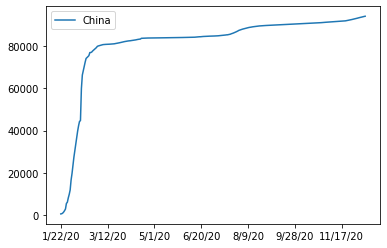

In [11]:
corona_dataset_aggregated.loc['China'].plot()
plt.legend()
#will plot the values on different date

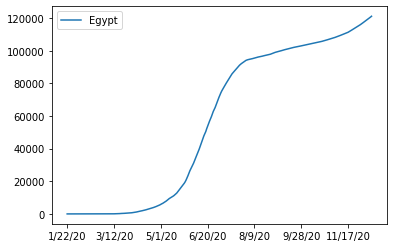

In [12]:
corona_dataset_aggregated.loc['Egypt'].plot()
plt.legend()

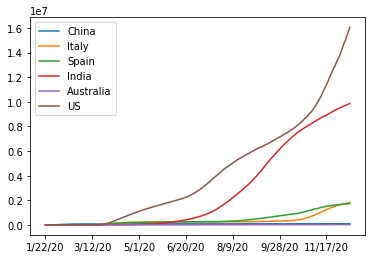

In [13]:
corona_dataset_aggregated.loc['China'].plot()
corona_dataset_aggregated.loc['Italy'].plot()
corona_dataset_aggregated.loc['Spain'].plot()
corona_dataset_aggregated.loc['India'].plot()
corona_dataset_aggregated.loc['Australia'].plot()
corona_dataset_aggregated.loc['US'].plot()
plt.legend()

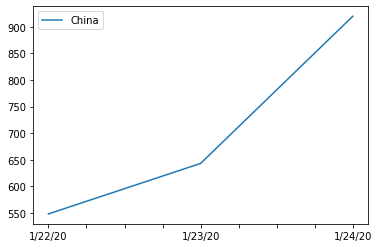

In [14]:
#Spread of the virus in China for the first 3 dates only
corona_dataset_aggregated.loc['China'][:3].plot()
plt.legend()

In the 1st 24 hrs, an increase in case (550 to 650) by 100

In the 2nd 24 hrs, an increase (650 to 900) by 250

We want to find a measure for new cases, so either say average or maximum number of new cases.

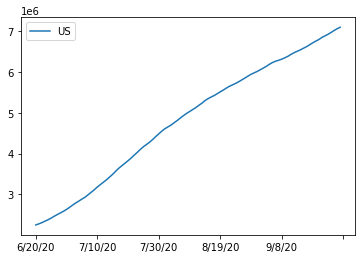

In [15]:
#Spread of the virus in USA from the day 150 to day 250
corona_dataset_aggregated.loc['US'][150:250].plot()
plt.legend()

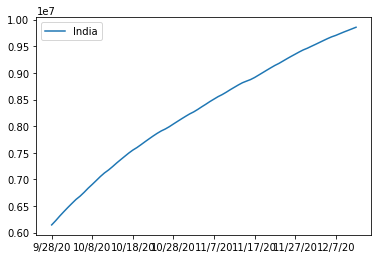

In [16]:
#Spread of the virus in USA from the day 250 to present avaiable data
corona_dataset_aggregated.loc['India'][250:].plot()
plt.legend()

### task 3.1: caculating the first derivative of the curve

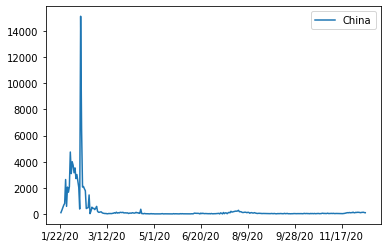

In [17]:
corona_dataset_aggregated.loc["China"].diff().plot()
plt.legend()

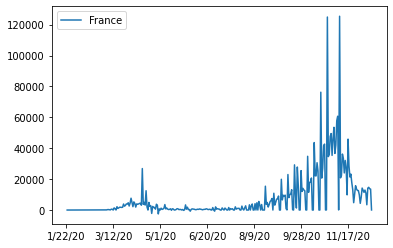

In [18]:
corona_dataset_aggregated.loc["France"].diff().plot()
plt.legend()

The above plots shows us the change in infection rate day by day and what we are looking for is the maximum number.

### task 3.2: find maxmimum infection rate for China, Italy and Spain

In [19]:
corona_dataset_aggregated.loc["China"].diff().max()
#In only 24 hrs, the difference was 15136

15136.0

In [20]:
corona_dataset_aggregated.loc["Italy"].diff().max()
#In only 24 hrs, the difference was 40902

40902.0

In [21]:
corona_dataset_aggregated.loc["Spain"].diff().max()
#In only 24 hrs, the difference was 55019

55019.0

### Task 3.3: find maximum infection rate for all of the countries. 

In [22]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries :
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
max_infection_rates

[915.0,
 879.0,
 1133.0,
 299.0,
 355.0,
 39.0,
 18326.0,
 2476.0,
 716.0,
 9586.0,
 4426.0,
 310.0,
 841.0,
 4019.0,
 12.0,
 1975.0,
 23921.0,
 1382.0,
 139.0,
 29.0,
 2036.0,
 1953.0,
 1328.0,
 69074.0,
 26.0,
 4828.0,
 315.0,
 2158.0,
 78.0,
 159.0,
 31.0,
 2324.0,
 7895.0,
 216.0,
 83.0,
 13990.0,
 15136.0,
 13056.0,
 44.0,
 649.0,
 414.0,
 2877.0,
 430.0,
 4620.0,
 124.0,
 827.0,
 15731.0,
 3557.0,
 99.0,
 280.0,
 8.0,
 2147.0,
 11536.0,
 1774.0,
 885.0,
 1750.0,
 55.0,
 757.0,
 147.0,
 1829.0,
 5.0,
 840.0,
 125414.0,
 570.0,
 248.0,
 5450.0,
 32734.0,
 1513.0,
 3316.0,
 6.0,
 4233.0,
 278.0,
 156.0,
 133.0,
 332.0,
 7.0,
 1324.0,
 6819.0,
 106.0,
 97894.0,
 8369.0,
 14051.0,
 5055.0,
 1515.0,
 9078.0,
 40902.0,
 244.0,
 2977.0,
 7933.0,
 18757.0,
 1554.0,
 1030.0,
 2220.0,
 1073.0,
 11505.0,
 14.0,
 930.0,
 2817.0,
 98.0,
 68.0,
 1639.0,
 49.0,
 4551.0,
 1967.0,
 7.0,
 614.0,
 257.0,
 2234.0,
 215.0,
 155.0,
 218.0,
 3.0,
 279.0,
 41.0,
 28115.0,
 1766.0,
 29.0,
 56.0,
 874.0,
 

In [23]:
corona_dataset_aggregated["max_infection_rates"] = max_infection_rates

In [24]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,46837,47072,47306,47516,47716,47851,48053,48116,48229,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,41302,42148,42988,43683,44436,45188,46061,46863,47742,879.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,86730,87502,88252,88825,89416,90014,90579,91121,91638,1133.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,6955,7005,7050,7084,7127,7162,7190,7236,7288,299.0
Angola,0,0,0,0,0,0,0,0,0,0,...,15493,15536,15591,15648,15729,15804,15925,16061,16161,355.0


### Task 3.4: create a new dataframe with only needed column 

In [25]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rates"])

In [26]:
corona_data.head(100)

,max_infection_rates
Country/Region,
Afghanistan,915.0
Albania,879.0
Algeria,1133.0
Andorra,299.0
Angola,355.0
...,...
Laos,14.0
Latvia,930.0
Lebanon,2817.0


### Task4: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Task 4.1 : importing the dataset

In [27]:
happiness_report_csv = pd.read_csv("worldwide_happiness_report.csv")

In [28]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Task 4.2: let's drop the useless columns 

In [29]:
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [30]:
happiness_report_csv.drop(useless_cols, axis=1, inplace=True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Task 4.3: changing the indices of the dataframe

In [31]:
happiness_report_csv.set_index("Country or region", inplace=True)

In [32]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Task4.4: now let's join two dataset we have prepared  

#### Corona Dataset :

In [33]:
corona_data.head()

,max_infection_rates
Country/Region,
Afghanistan,915.0
Albania,879.0
Algeria,1133.0
Andorra,299.0
Angola,355.0


In [34]:
corona_data.shape    #Tuple with 191 countries

(191, 1)

#### wolrd happiness report Dataset :

In [35]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [36]:
happiness_report_csv.shape    #156 countries, less than corona data

(156, 4)

In [37]:
#Inner join
data = corona_data.join(happiness_report_csv,
                how = "inner"    #method/type of join
                )
data.head()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,879.0,0.947,0.848,0.874,0.383
Algeria,1133.0,1.002,1.160,0.785,0.086
Argentina,18326.0,1.092,1.432,0.881,0.471
Armenia,2476.0,0.850,1.055,0.815,0.283


### Task 4.5: correlation matrix 

In [38]:
data.corr()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rates,1.000000,0.117017,0.083881,0.089714,-0.091181
GDP per capita,0.117017,1.000000,0.757521,0.859431,0.394799
Social support,0.083881,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.089714,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,-0.091181,0.394799,0.456317,0.423146,1.000000


There is +ve correlation between max_infection_rate and all features except Freedom to make life choices

### Task 5: Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [39]:
data.head()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,879.0,0.947,0.848,0.874,0.383
Algeria,1133.0,1.002,1.160,0.785,0.086
Argentina,18326.0,1.092,1.432,0.881,0.471
Armenia,2476.0,0.850,1.055,0.815,0.283


### Task 5.1: Plotting GDP vs maximum Infection rate

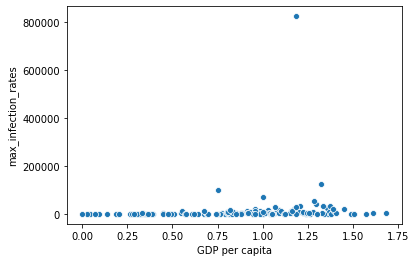

In [40]:
x = data["GDP per capita"]
y = data["max_infection_rates"]
sns.scatterplot(x,y)

#We can see the values need different scaling

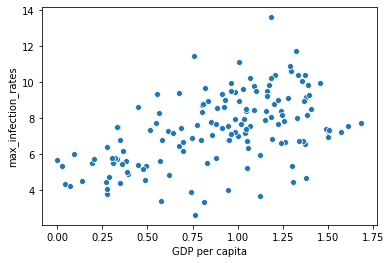

In [41]:
#Will apply log scaling to y
x = data["GDP per capita"]
y = data["max_infection_rates"]
sns.scatterplot(x,np.log(y))

#Now we can see +ve correlation

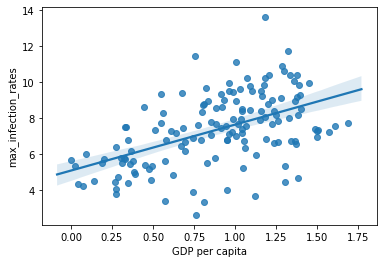

In [42]:
#RegPlot
x = data["GDP per capita"]
y = data["max_infection_rates"]

sns.regplot(x,np.log(y))

#Line fitted, +ve slope seen

### Task 5.2: Plotting Social support vs maximum Infection rate

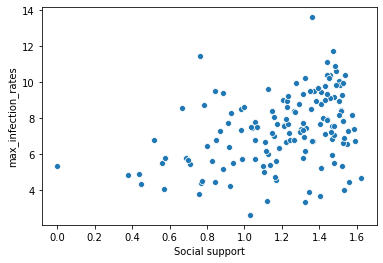

In [43]:
x = data["Social support"]
y = data["max_infection_rates"]

sns.scatterplot(x,np.log(y))

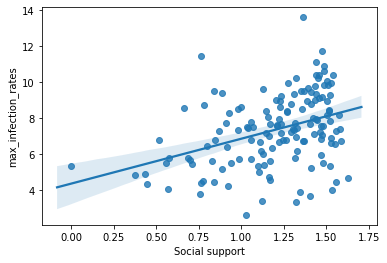

In [44]:
x = data["Social support"]
y = data["max_infection_rates"]

sns.regplot(x,np.log(y))

### Task 5.3: Plotting Healthy life expectancy vs maximum Infection rate

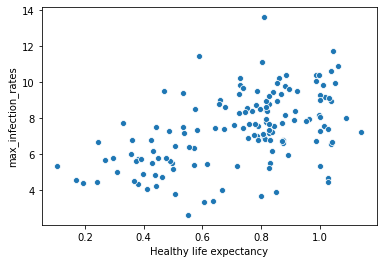

In [45]:
x = data["Healthy life expectancy"]
y = data["max_infection_rates"]

sns.scatterplot(x,np.log(y))

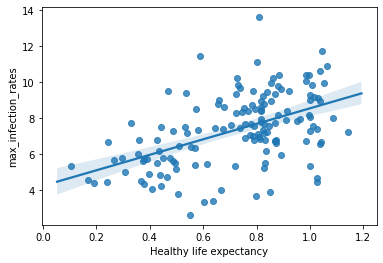

In [46]:
x = data["Healthy life expectancy"]
y = data["max_infection_rates"]

sns.regplot(x,np.log(y))

### Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate

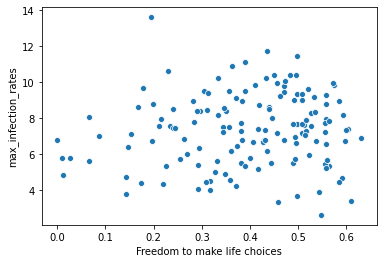

In [47]:
x = data["Freedom to make life choices"]
y = data["max_infection_rates"]

sns.scatterplot(x,np.log(y))

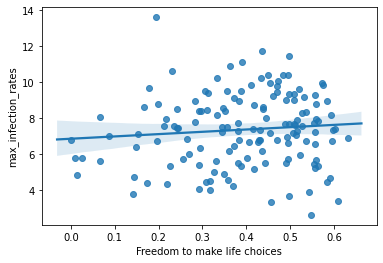

In [48]:
x = data["Freedom to make life choices"]
y = data["max_infection_rates"]

sns.regplot(x,np.log(y))

#### Task 6 : Coronavirus Deaths

In [49]:
corona_deaths_csv = pd.read_csv("covid19_deaths_dataset.csv")
corona_deaths_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1846,1846,1864,1874,1900,1906,1919,1935,1945,1956
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,852,870,889,905,922,936,951,965,977,989
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2480,2492,2501,2516,2527,2539,2554,2564,2575,2584
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,77,77,78,78,78,78,78,78,78,78
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,352,353,354,354,354,355,358,362,365,366


In [50]:
corona_deaths_csv.shape

(271, 330)

In [51]:
corona_deaths_csv.drop(["Lat",
                        "Long"],
                        axis=1,
                        #default value, annotation axis=0 which is equal to rows
                        inplace = True   #will change the corona dataset too
                        )

In [52]:
corona_deaths_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1846,1846,1864,1874,1900,1906,1919,1935,1945,1956
1,NaN,Albania,0,0,0,0,0,0,0,0,...,852,870,889,905,922,936,951,965,977,989
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2480,2492,2501,2516,2527,2539,2554,2564,2575,2584
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,77,77,78,78,78,78,78,78,78,78
4,NaN,Angola,0,0,0,0,0,0,0,0,...,352,353,354,354,354,355,358,362,365,366


In [53]:
corona_dataset_aggregated2 = corona_deaths_csv.groupby("Country/Region").sum()
corona_dataset_aggregated2.shape

(191, 326)

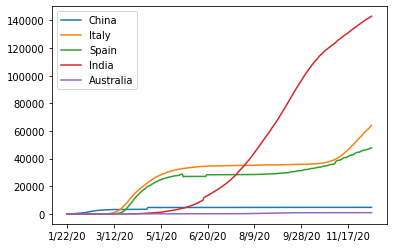

In [54]:
#Comparsion of Deaths of various countries
corona_dataset_aggregated2.loc['China'].plot()
corona_dataset_aggregated2.loc['Italy'].plot()
corona_dataset_aggregated2.loc['Spain'].plot()
corona_dataset_aggregated2.loc['India'].plot()
corona_dataset_aggregated2.loc['Australia'].plot()
plt.legend()

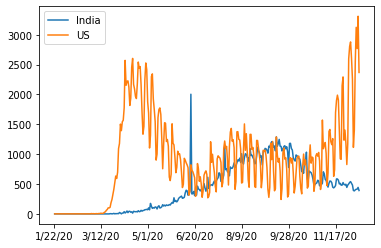

In [55]:
#Comparsion graph of maximum deaths occurred in 24 hours between countries India and USA
#Basically finding first derivative of the curve
corona_dataset_aggregated2.loc["India"].diff().plot()
corona_dataset_aggregated2.loc["US"].diff().plot()
plt.legend()

In [56]:
#finding maximum death rate for all of the countries
countries2 = list(corona_dataset_aggregated2.index)
max_death_rates = []
for c in countries2 :
    max_death_rates.append(corona_dataset_aggregated2.loc[c].diff().max())
max_death_rates

[42.0,
 19.0,
 30.0,
 6.0,
 12.0,
 1.0,
 3351.0,
 41.0,
 59.0,
 141.0,
 47.0,
 15.0,
 7.0,
 64.0,
 1.0,
 11.0,
 496.0,
 16.0,
 3.0,
 0.0,
 1656.0,
 84.0,
 3.0,
 1703.0,
 1.0,
 221.0,
 4.0,
 48.0,
 1.0,
 3.0,
 0.0,
 64.0,
 251.0,
 7.0,
 10.0,
 1057.0,
 1290.0,
 400.0,
 2.0,
 24.0,
 20.0,
 52.0,
 4.0,
 78.0,
 6.0,
 8.0,
 295.0,
 22.0,
 2.0,
 4.0,
 0.0,
 39.0,
 3852.0,
 97.0,
 16.0,
 32.0,
 0.0,
 6.0,
 5.0,
 28.0,
 1.0,
 43.0,
 1438.0,
 5.0,
 14.0,
 50.0,
 604.0,
 15.0,
 121.0,
 0.0,
 61.0,
 3.0,
 4.0,
 4.0,
 12.0,
 0.0,
 56.0,
 193.0,
 5.0,
 2003.0,
 175.0,
 486.0,
 122.0,
 220.0,
 47.0,
 993.0,
 9.0,
 51.0,
 91.0,
 324.0,
 41.0,
 11.0,
 61.0,
 11.0,
 727.0,
 0.0,
 16.0,
 24.0,
 5.0,
 17.0,
 26.0,
 4.0,
 45.0,
 24.0,
 2.0,
 10.0,
 12.0,
 12.0,
 2.0,
 11.0,
 7.0,
 0.0,
 12.0,
 2.0,
 2789.0,
 26.0,
 2.0,
 0.0,
 13.0,
 92.0,
 6.0,
 6.0,
 30.0,
 234.0,
 4.0,
 18.0,
 4.0,
 31.0,
 46.0,
 21.0,
 67.0,
 313.0,
 41.0,
 1.0,
 33.0,
 4143.0,
 259.0,
 674.0,
 95.0,
 7.0,
 213.0,
 601.0,
 3.0,
 0.0,


In [57]:
corona_dataset_aggregated2["max_death_rates"] = max_death_rates
corona_death = pd.DataFrame(corona_dataset_aggregated2["max_death_rates"])
corona_death.head()

,max_death_rates
Country/Region,
Afghanistan,42.0
Albania,19.0
Algeria,30.0
Andorra,6.0
Angola,12.0


In [58]:
#Inner join
data2 = corona_data.join(corona_death,
                how = "inner"    #method/type of join
                )
data2.head()

,max_infection_rates,max_death_rates
Country/Region,,
Afghanistan,915.0,42.0
Albania,879.0,19.0
Algeria,1133.0,30.0
Andorra,299.0,6.0
Angola,355.0,12.0


#### Task 7 : Coronavirus Recoveries

In [59]:
corona_recovered_csv = pd.read_csv("covid19_recovered_dataset.csv")
corona_recovered_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37260,37260,37393,37685,37879,37920,38032,38099,38141,38200
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,20484,20974,21286,21617,22180,22527,23072,23609,24136,24520
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,55538,56079,56617,57146,57648,58146,58146,59135,59590,60028
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6066,6130,6171,6238,6293,6367,6452,6505,6598,6629
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,8244,8299,8335,8338,8353,8470,8579,8679,8798,8841


In [60]:
corona_recovered_csv.drop(["Lat",
                        "Long"],
                        axis=1,
                        #default value, annotation axis=0 which is equal to rows
                        inplace = True   #will change the corona dataset too
                        )

In [61]:
corona_dataset_aggregated3 = corona_recovered_csv.groupby("Country/Region").sum()

In [62]:
corona_dataset_aggregated3

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,37260,37260,37393,37685,37879,37920,38032,38099,38141,38200
Albania,0,0,0,0,0,0,0,0,0,0,...,20484,20974,21286,21617,22180,22527,23072,23609,24136,24520
Algeria,0,0,0,0,0,0,0,0,0,0,...,55538,56079,56617,57146,57648,58146,58146,59135,59590,60028
Andorra,0,0,0,0,0,0,0,0,0,0,...,6066,6130,6171,6238,6293,6367,6452,6505,6598,6629
Angola,0,0,0,0,0,0,0,0,0,0,...,8244,8299,8335,8338,8353,8470,8579,8679,8798,8841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,0,0,0,0,0,0,0,0,0,...,1209,1220,1220,1220,1224,1224,1225,1225,1238,1238
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,68250,70206,71236,72773,74053,75257,76893,78715,81166,83123
Yemen,0,0,0,0,0,0,0,0,0,0,...,1525,1534,1547,1549,1554,1382,1383,1383,1383,1383


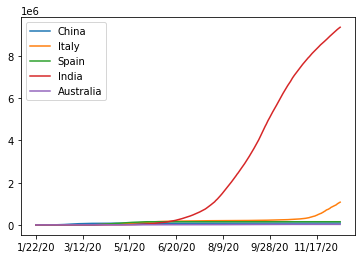

In [63]:
corona_dataset_aggregated3.loc['China'].plot()
corona_dataset_aggregated3.loc['Italy'].plot()
corona_dataset_aggregated3.loc['Spain'].plot()
corona_dataset_aggregated3.loc['India'].plot()
corona_dataset_aggregated3.loc['Australia'].plot()
plt.legend()

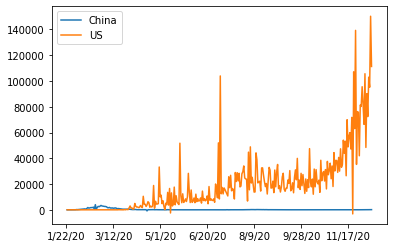

In [64]:
#Comparsion graph of maximum recoveries occurred in 24 hours between countries China and USA
#Basically finding first derivative of the curve
corona_dataset_aggregated3.loc["China"].diff().plot()
corona_dataset_aggregated3.loc["US"].diff().plot()
plt.legend()

In [65]:
#finding maximum recoveries rate for all of the countries
countries3 = list(corona_dataset_aggregated3.index)
max_recovered_rates = []
for c in countries3 :
    max_recovered_rates.append(corona_dataset_aggregated3.loc[c].diff().max())
max_recovered_rates

[1930.0,
 572.0,
 1178.0,
 259.0,
 439.0,
 34.0,
 73147.0,
 8319.0,
 2605.0,
 7446.0,
 4085.0,
 407.0,
 995.0,
 17533.0,
 8.0,
 2435.0,
 934.0,
 420.0,
 564.0,
 27.0,
 2393.0,
 2187.0,
 3511.0,
 388340.0,
 14.0,
 4290.0,
 145.0,
 3765.0,
 89.0,
 507.0,
 32.0,
 2326.0,
 23848.0,
 322.0,
 60.0,
 41227.0,
 3995.0,
 89557.0,
 41.0,
 2145.0,
 532.0,
 7138.0,
 425.0,
 4177.0,
 196.0,
 438.0,
 33468.0,
 1330.0,
 285.0,
 294.0,
 14.0,
 2121.0,
 23131.0,
 1716.0,
 1074.0,
 1340.0,
 51.0,
 588.0,
 277.0,
 4493.0,
 5.0,
 1900.0,
 3564.0,
 471.0,
 320.0,
 4301.0,
 22470.0,
 5526.0,
 3325.0,
 9.0,
 18376.0,
 303.0,
 422.0,
 170.0,
 412.0,
 10.0,
 1496.0,
 8223.0,
 115.0,
 101468.0,
 5810.0,
 13000.0,
 8479.0,
 9156.0,
 8308.0,
 39266.0,
 370.0,
 10856.0,
 79956.0,
 20459.0,
 11646.0,
 1369.0,
 2235.0,
 1513.0,
 6883.0,
 5.0,
 163.0,
 6260.0,
 167.0,
 286.0,
 9594.0,
 84.0,
 11759.0,
 4523.0,
 7.0,
 681.0,
 523.0,
 2555.0,
 287.0,
 73.0,
 177.0,
 3.0,
 223.0,
 72.0,
 24911.0,
 6696.0,
 25.0,
 21.0,


In [66]:
corona_dataset_aggregated3["max_recovered_rates"] = max_recovered_rates
corona_rcvr = pd.DataFrame(corona_dataset_aggregated3["max_recovered_rates"])
corona_rcvr.head()

,max_recovered_rates
Country/Region,
Afghanistan,1930.0
Albania,572.0
Algeria,1178.0
Andorra,259.0
Angola,439.0


In [67]:
#Now Let us Join all the 3 tables max_infection_rates, max_death_rates, max_recovered_rates
data3 = data2.join(corona_rcvr,
                how = "inner"    #method/type of join
                )
data3.head()

,max_infection_rates,max_death_rates,max_recovered_rates
Country/Region,,,
Afghanistan,915.0,42.0,1930.0
Albania,879.0,19.0,572.0
Algeria,1133.0,30.0,1178.0
Andorra,299.0,6.0,259.0
Angola,355.0,12.0,439.0


In [68]:
#Now Let us Join merge the data3 with happiness_report_csv
df = data3.join(happiness_report_csv,
                how = "inner"    #method/type of join
                )
df.head()

,max_infection_rates,max_death_rates,max_recovered_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,42.0,1930.0,0.350,0.517,0.361,0.000
Albania,879.0,19.0,572.0,0.947,0.848,0.874,0.383
Algeria,1133.0,30.0,1178.0,1.002,1.160,0.785,0.086
Argentina,18326.0,3351.0,73147.0,1.092,1.432,0.881,0.471
Armenia,2476.0,41.0,8319.0,0.850,1.055,0.815,0.283


In [69]:
df.corr()

,max_infection_rates,max_death_rates,max_recovered_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rates,1.000000,0.121093,0.948285,0.117017,0.083881,0.089714,-0.091181
max_death_rates,0.121093,1.000000,0.128559,0.149209,0.146663,0.207477,0.115828
max_recovered_rates,0.948285,0.128559,1.000000,0.092200,0.080182,0.065109,-0.089803
GDP per capita,0.117017,0.149209,0.092200,1.000000,0.757521,0.859431,0.394799
Social support,0.083881,0.146663,0.080182,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.089714,0.207477,0.065109,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,-0.091181,0.115828,-0.089803,0.394799,0.456317,0.423146,1.000000


#### Task 8 : Analyze max_infection_rate with max_death_rate and max_recovered_rate

C:\Users\Chelsea\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


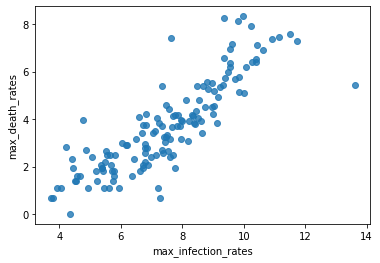

In [70]:
x = df["max_infection_rates"]
y = df["max_death_rates"]

sns.regplot(np.log(x),np.log(y))

C:\Users\Chelsea\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


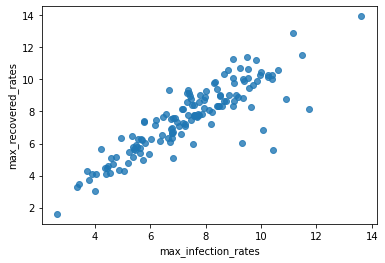

In [71]:
x = df["max_infection_rates"]
y = df["max_recovered_rates"]

sns.regplot(np.log(x),np.log(y))

C:\Users\Chelsea\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Chelsea\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1942: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


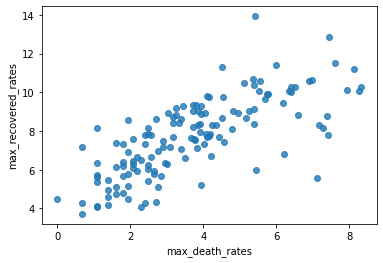

In [72]:
x = df["max_death_rates"]
y = df["max_recovered_rates"]

sns.regplot(np.log(x),np.log(y))